In [114]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [115]:
def Thresh_Hesap(image):
    bins_num = 256

    hist, bin_edges = np.histogram(image, bins=bins_num)

    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]
    return threshold

In [116]:
image=cv2.imread("img/park.jpg",0)
img_Local=image.copy()
h,w=image.shape
x=int(h/20)
y=int(w/20)
for i in range(0,h,x):
    for j in range(0,w,y):
        roi=img_Local[i:i+x,j:j+y]
        op_thres = Thresh_Hesap(roi)*0.96
        ret1, roi_Threshold=cv2.threshold(roi,op_thres,255,cv2.THRESH_BINARY)
        img_Local[i:i+x,j:j+y]=roi_Threshold

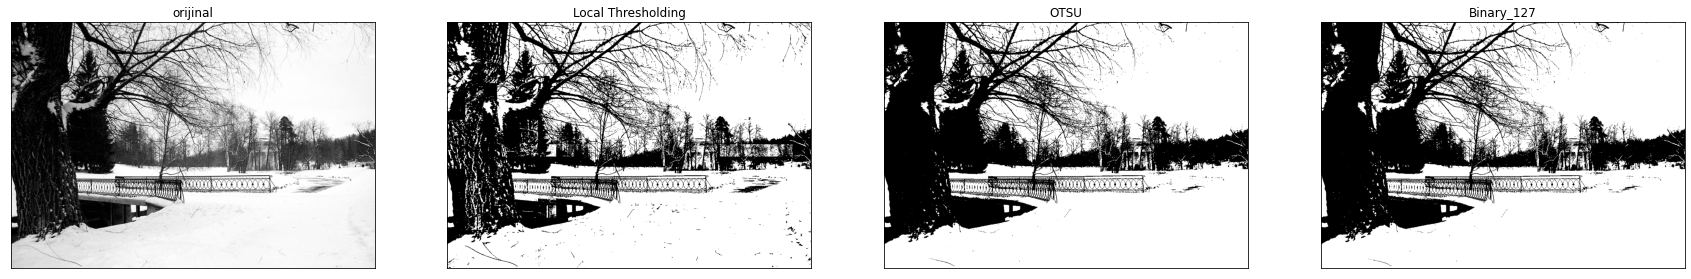

In [117]:
th_ret1, Binary_127=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
th_ret2, Thresh_OTSU=cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
titles=["orijinal","Local Thresholding","OTSU","Binary_127"]
images=[image,img_Local,Thresh_OTSU,Binary_127]
plt.figure(figsize=(30,30))
for i in range(4):

    plt.subplot(1,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()